Inducción de reglas con el algoritmo Apriori --- 25:15 min
===

* 25:15 min | Ultima modificación: Abril 5, 2021 | [YouTube](https://youtu.be/luiqF054_xU)

Una de las aplicaciones directas del concepto de probabilidad como frecuencia es la construcción de sistemas de recomendación basados en que ítems siempre van juntos. Este tipo de sistema de recomendación es diferente de aquellos que buscan clientes con comportamientos similares para realizar la recomendación de productos. En términos más generales, este tipo de sistemas permite obtener los conjuntos de ítems que los clientes suelen seleccionar. En este tutorial se discute el algoritmo [Apriori](https://en.wikipedia.org/wiki/Apriori_algorithm) para la construcción de reglas de asociación entre ítems. 

## Descripción del problema

Un problema típico de los retailers es poder recomendar productos afines a sus compradores basados en el histórico general de las ventas. Estas recomendaciones tienen como fin sugerirle al usuario productos que podría haber olvidado y que usualmente se llevan juntos, o nuevos productos sustitutos que reemplazarían productos ya posicionados. Esta recomendación se basa en el histórico general de la tienda (productos que todas las personas usualmente llevan juntos) y no en las preferencias individuales de los clientes.

Para ejemplificar el proceso de construcción de las reglas de inducción, se tiene un conjunto ficticio de 10 transacciones realizadas sobre seis posibles ítems ($x_1, ..., x_6)$, donde cada fila representa una transacción:


     #  Productos
    --------------------
     1  x1, x2, x3
     2  x1, x3
     3  x2, x4
     4  x1, x2, x3
     5  x1, x2, x5
     6  x1, x2, x3, x4
     7  x4, x6
     8  x1, x2, x4, x6
     9  x1, x3, x4
    10  x1, x2, x3
   

El problema consiste en derivar un conjunto de reglas de asociación que permita recomenda un grupo de productos a partir de los productos que ya seleccionó el cliente. Por ejemplo, si un cliente compra $x_1$ y $x_3$, ¿qué producto o productos se le deben recomendar?

## Transacción

Una **transacción** se representa a través del conjunto de ítems comprados en ella. Así, una transacción con cuatro ítems se representa como:

$$\{x_1, x_2, x_3, x_4 \}$$

El problema descrito equivale a determinar los productos $x_i$, con $x_i \notin \{x_1, x_2, x_3, x_4 \}$, con mayor probabilidad de ser comprados sabiendo que el cliente ya seleccionó $x_1$, $x_2$, $x_3$ y $x_4$. Dicho de otra forma, se deben computar las probabilidades condicionales $\text{Pr}(x_i \, | \,  x_1, x_2, x_3, x_4)$ y recomendar los $N$ productos $x_i$ con mayor probabilidad condicional de compra. En este problema se asume que SI existe una dependencia entre la compra de un producto y otro; si esta dependencia no existe, no tiene sentido construir el sistema de recomendación.

## Regla de asociación

De esta forma, el objetivo del sistema de recomendación es construir una **regla de asociación** de la forma:

$$\{x_2, x_3, x_4 \} \rightarrow x_1$$

la cual indica que cuando se compran $x_2$, $x_3$ y $x_4$ también se compra (implica) $x_1$.

Es posible evaluar todas las posibles reglas por fuerza bruta (enumeración). Para el caso anterior, las reglas podrían ser: $\{x_2\} \rightarrow x_1$, $\{x_3\} \rightarrow x_1$, $\{x_4\} \rightarrow x_1$,  $\{x_1\} \rightarrow x_2$, $\{x_3\} \rightarrow x_2$, ..., 
$\{x_2, x_3\} \rightarrow x_1$, $...$, $\{x_1, x_2\} \rightarrow x_4$ y así sucesivamente, hasta construir todas las permutaciones posibles. Sin embargo, esta solución resulta imposible en términos prácticos debido a que la cantidad de reglas crece exponencialmente.

**Actividad 1.---** ¿Cuántas reglas posibles hay para el caso anterior?

## Algoritmo Apriori

El algoritmo **Apriori** se basa en evaluar solamente las reglas que tienen una frecuencia alta (mayor probabilidad). El algoritmo se basa en la siguiente heurística: para que el conjunto $\{x_1, x_2\}$ sea frecuente (que tenga una probabilidad alta), los ítems $x_1$ y $x_2$ deben ser frecuentes; es decir, si $x_1$ o $x_2$ son infrecuentes, su combinación no es evaluada.  

Para medir la **importancia** de una regla se usa el soporte y la confianza. Si una regla de asocación se escribe como 

$$X \rightarrow Y$$

el soporte es la proporción de veces que $X$ aparece respecto al total de transacciones; nótese que acá se está hablando explícitamente de probabilidad. 

La **confianza** se define como:

$$\text{confidence}(X \rightarrow Y) = \frac{\text{support}(X, Y)}{\text{support}(X)} $$

la cual se interpreta como la cantidad de veces en que la presencia de $X$ resulta en la presencia de $Y$. Es decir, ya que se dio $X$ que tan probable es que se de $Y$.

**Pregunta.---** ¿Es verdad que $\text{confidence}(X \rightarrow Y) = \text{confidence}(Y \rightarrow X)$?

El algoritmo Apriori opera en dos fases: En la primera fase se identifican todos los conjuntos de ítems que cumplen con el soporte mínimo requerido (o probabilidad mínima de compra). En la segunda fase, con los ítems identificados en la fase uno, se crean reglas que cumplen con la confianza mínima requerida.

En la **primera fase**, se procede de forma constructiva de la siguiente forma (explícitamente se está calculado probabilidad):

* Se calcula el soporte de cada ítem y se seleccionan aquellos ítems que cumplen con el soporte mínimo requerido.


* Se forman todos las conjuntos (combinaciones) de dos ítems. Sólo se consideran combinaciones de dos ítems que contengan ítems que cumplen el soporte mínimo requerido. Se seleccionan aquellas combinaciones de dos ítems que cumplen con el soporte mínimo requerido.


* Se forman todos los conjuntos de tres ítems. No se consideran combinaciones que contengan conjuntos no frecuentes de dos ítems. Es decir, si la combinación {$x_1$, $x_4$} no se frecuente (no cumple con el soporte mínimo requerido), entonces no se consideran combinaciones como {$x_1$, $x_3$, $x_4$} o {$x_1$, $x_2$, $x_4$}.


* Se continua con las combinaciones de cuatro ítems y se seleccionan aquellas que cumplan con el soporte mínimo requerido. El algoritmo se detiene cuando ya no hay combinaciones de ítems que cumpan con el soporte mínimo.

**Actividad 2.---** Calcule el soporte para $x_1$, ..., $x_6$, esto es, la probabilidad de que $x_i$ aparezca en una transacción. Si el soporte mínimo requerido es del 40%, ¿cuáles ítems debe seleccionarse?

         X   support   seleccionado
     --------------------------------
        x1         ?              ?
        x2      7/10             Si
        x3         ?              ?
        x4         ?              ?
        x5         ?              ?
        x6      2/10             No

**Actividad 3.---** Cuáles las combinaciones de dos ítems que deben ser consideradas de acuerdo con el resultado del ejercicio anterior? Cúales cumplen con un soporte mínimo del 40%?

              X   support   seleccionado
     -------------------------------------
       {x1, x2}      6/10             Si
              ?         ?              ?
              ?         ?              ?
              ?         ?              ?
       {x2, x4}      3/10             No
              ?         ?              ?
               

**Actividad 4.---** Cúales combinaciones de tres ítems pueden considerarse y cuáles cumplen con el soporte mínimo requerido?

                X   support   seleccionado
     ---------------------------------------
        {?, ?, ?}         ?              ?

En la **segunda fase**, para todas las combinaciones de 2, 3, ... ítems, se generan todas las reglas posibles y se evalúa su confianza. Se seleccionan aquellas que cumplen con la confianza mínima requerida. Si la combinación {$x_1$, $x_2$} cumplio con el soporte mínimo, entonces se consideran las reglas {$x_1$} $\to$ {$x_2$} y {$x_2$} $\to$ {$x_1$}. Nótese que es posible considerar reglas con varios elementos en el consecuente como por ejemplo {$x_1$} $\to$ {$x_2$, $x_3$}.

El *lift* de una regla mide la importancia de una regla en relación a la tasa típica de compra, dado que se sabe que un ítem o un conjunto de ítems han sido comprados.

$$\text{lift}(X \rightarrow Y) = \frac{\text{confidence}(X, Y)}{\text{support}(Y)} $$


**Actividad 5.---** Para todas las combinaciones que cumplen con el soporte mínimo requerido, forme las correspodientes reglas y cómpute la confianza y el lift. Si la confianza mínima es del 70%, ¿cuáles reglas deben ser seleccionadas?


     Combinación    Reglas           Confianza   Lift  Seleccionada
    ----------------------------------------------------------------
     {x1, x2}       {x1}     -> {x2}       75%      ?            Si
                    {x2}     -> {x1}       86%      ?             ?
    ----------------------------------------------------------------
     {?, x3}        {?}      -> {?}          ?      ?             ?
                    {x3}     -> {?}          ?      ?             ?
    ----------------------------------------------------------------
     {x2, ?}        {?}      -> {x2}         ?      ?             ?
                    {?}      -> {?}          ?      ?             ?
    ----------------------------------------------------------------
     {x1, x2, x3}   {?}      -> {?, ?}       ?      ?             ?
                    {?}      -> {?, ?}       ?      ?             ?
                    {x3}     -> {x1, x2}   67%      ?            No
                    {?, x2}  -> {?}          ?      ?             ?
                    {?, ?}   -> {x2}         ?      ?             ?
                    {x2, x1} -> {?}          ?      ?             ?
    ----------------------------------------------------------------
 

**Pregunta.---** Si un cliente compra $x_1$ y $x_3$, ¿qué producto o productos se le deben recomendar?

## Solución usando el lenguaje R

A continuación se describen las funcionalidades del paquete `arules` del lenguaje R para la construcción de reglas de asociación.

In [1]:
##
## Preparación. Se utiliza el paquete rpy2 
## para ejecutar código R dentro de Python.
##
%load_ext rpy2.ipython

In [2]:
%%sh
if /usr/bin/test ! -d /usr/local/lib/R/site-library/arules; 
then    
    sudo Rscript -e 'install.packages("arules")'
fi

### Preparación

In [3]:
%%R
## Se carga la librería
library(arules)

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘arules’


R[write to console]: The following objects are masked from ‘package:base’:

    abbreviate, write




### Formato del archivo de datos

In [4]:
%%writefile data.csv
x1,x2,x3
x1,x3
x2,x4
x1,x2,x3
x1,x2,x5
x1,x2,x3,x4
x4,x6
x1,x2,x4,x6
x1,x3,x4
x1,x2,x3

Overwriting apriori.csv


### Lectura de las transacciones

In [5]:
%%R
##
## Se leen los datos
##
transactions <- read.transactions("data.csv", sep = ",")

In [6]:
%%R
##
## Se imprimen los items por transacción
##
inspect(transactions)

     items        
[1]  {x1,x2,x3}   
[2]  {x1,x3}      
[3]  {x2,x4}      
[4]  {x1,x2,x3}   
[5]  {x1,x2,x5}   
[6]  {x1,x2,x3,x4}
[7]  {x4,x6}      
[8]  {x1,x2,x4,x6}
[9]  {x1,x3,x4}   
[10] {x1,x2,x3}   


### Análisis exploratorio

In [7]:
%%R
##
## Se obtiene la información más relevante de los datos:
##
##    * Número de transacciones
##    * Número total de ítems
##    * Número de transacciones por cantidad de ítems (y cuartiles)
##
summary(transactions)

transactions as itemMatrix in sparse format with
 10 rows (elements/itemsets/transactions) and
 6 columns (items) and a density of 0.4833333 

most frequent items:
     x1      x2      x3      x4      x6 (Other) 
      8       7       6       5       2       1 

element (itemset/transaction) length distribution:
sizes
2 3 4 
3 5 2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.25    3.00    2.90    3.00    4.00 

includes extended item information - examples:
  labels
1     x1
2     x2
3     x3


In [8]:
%%R
##
## Se imprime la frequencia de compra, es decir,  
## la frecuencia de cada ítem en el total de trasacciones
##
itemFrequency(transactions)

 x1  x2  x3  x4  x5  x6 
0.8 0.7 0.6 0.5 0.1 0.2 


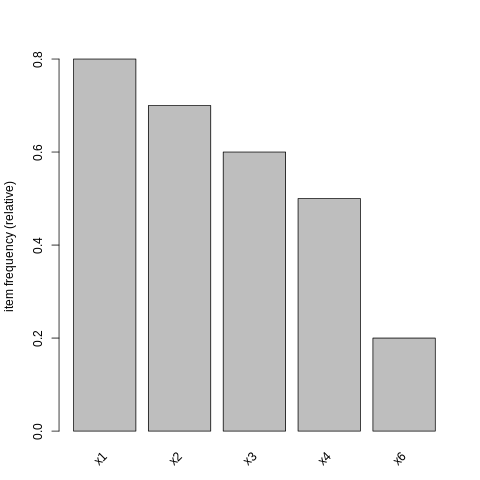

In [9]:
%%R
##
## Se grafica un histograma que muestra la frecuencia
## con que se compraron ciertos items. El parámetro
## `support`  corresponde a la frecuencia mínima que
## deben tener un item para que sea incluído en la gráfica.
## En este caso un item debe aparecer en 0.2 * 10 = 2
## transacciones para ser tenido en cuenta. Nóte que no
## aparece x5.
##
options(repr.plot.width = 3, repr.plot.height = 2)
itemFrequencyPlot(transactions, support = 0.2)

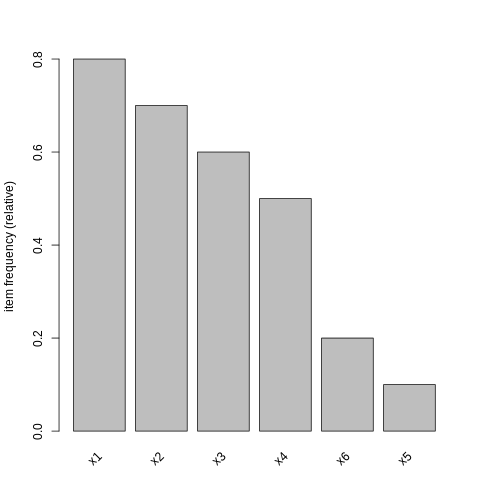

In [10]:
%%R
##
## Se obtiene la misma gráfica anterior 
## pero para los ítems más comprados.
## La gráfica muestra que x1 es el más comprado
## y x5 el menos comprado
##
options(repr.plot.width = 3, repr.plot.height = 2)
itemFrequencyPlot(transactions, topN = 6)

### Construcción del sistema de reglas de asociación

In [11]:
%%R
##
## La corrida con los parámetros por defecto de la
## función no generan reglas para los datos suministrados.
## El valor por defecto de support es 0.1, es decir,
## un item debe aparecer en un mínimo de 1 transacciones
## para ser considerado.
##
apriori(transactions)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [18 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
set of 18 rules 


In [12]:
%%R
##
## El parámetro confianza representa el porcentaje mínimo
## de veces que una regla debe ser correcta para que 
## sea considerada; esto permite eliminar reglas sin
## sentido. El parámetro minlen indica que las reglas 
## deben contener al menos 2 items.
##
transactionsrules <- apriori(transactions, 
                        parameter = list(support = 0.006, 
                                         confidence = 0.25, 
                                         minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [48 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [13]:
%%R
##
## Número de reglas generadas.
## Se generaron 48 reglas
##
transactionsrules

set of 48 rules 


In [14]:
%%R
##
## Se imprime un resumen de las reglas generadas.
##
##   * Hay 18 reglas con 2 ítems, 22 reglas con 3 ítems
##     y así sucesivamente.
##
##   * Luego se imprimen los estadísticos para la cantidad
##     de reglas por ítem
##
##   * Seguidamente aparece el resumen de las métricas de
##     las reglas de asociación
##
summary(transactionsrules)

set of 48 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
18 22  8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.792   3.000   4.000 

summary of quality measures:
    support         confidence          lift            count      
 Min.   :0.1000   Min.   :0.2500   Min.   :0.5000   Min.   :1.000  
 1st Qu.:0.1000   1st Qu.:0.4821   1st Qu.:0.7143   1st Qu.:1.000  
 Median :0.1000   Median :0.6667   Median :1.0714   Median :1.000  
 Mean   :0.2104   Mean   :0.6715   Mean   :1.1288   Mean   :2.104  
 3rd Qu.:0.3000   3rd Qu.:1.0000   3rd Qu.:1.2946   3rd Qu.:3.000  
 Max.   :0.6000   Max.   :1.0000   Max.   :2.5000   Max.   :6.000  

mining info:
         data ntransactions support confidence
 transactions            10   0.006       0.25


In [15]:
%%R
##
## Visualización de todas las reglas.
##
inspect(transactionsrules)

     lhs           rhs  support confidence lift      count
[1]  {x5}       => {x2} 0.1     1.0000000  1.4285714 1    
[2]  {x5}       => {x1} 0.1     1.0000000  1.2500000 1    
[3]  {x6}       => {x4} 0.2     1.0000000  2.0000000 2    
[4]  {x4}       => {x6} 0.2     0.4000000  2.0000000 2    
[5]  {x6}       => {x2} 0.1     0.5000000  0.7142857 1    
[6]  {x6}       => {x1} 0.1     0.5000000  0.6250000 1    
[7]  {x4}       => {x3} 0.2     0.4000000  0.6666667 2    
[8]  {x3}       => {x4} 0.2     0.3333333  0.6666667 2    
[9]  {x4}       => {x2} 0.3     0.6000000  0.8571429 3    
[10] {x2}       => {x4} 0.3     0.4285714  0.8571429 3    
[11] {x4}       => {x1} 0.3     0.6000000  0.7500000 3    
[12] {x1}       => {x4} 0.3     0.3750000  0.7500000 3    
[13] {x3}       => {x2} 0.4     0.6666667  0.9523810 4    
[14] {x2}       => {x3} 0.4     0.5714286  0.9523810 4    
[15] {x3}       => {x1} 0.6     1.0000000  1.2500000 6    
[16] {x1}       => {x3} 0.6     0.7500000  1.2500000 6  

In [16]:
%%R
##
## Se puede inspeccionar un conjunto de reglas en particular
##
inspect(sort(transactionsrules, by = "lift")[1:5])

    lhs           rhs  support confidence lift count
[1] {x1,x2,x4} => {x6} 0.1     0.5        2.5  1    
[2] {x6}       => {x4} 0.2     1.0        2.0  2    
[3] {x4}       => {x6} 0.2     0.4        2.0  2    
[4] {x2,x6}    => {x4} 0.1     1.0        2.0  1    
[5] {x1,x6}    => {x4} 0.1     1.0        2.0  1    


In [17]:
%%R
##
## Se puede obtener un subconjunto de las reglas que
## cumplen una condición particular
##
berryrules <- subset(transactionsrules, items %in% "x2")
inspect(transactionsrules)

     lhs           rhs  support confidence lift      count
[1]  {x5}       => {x2} 0.1     1.0000000  1.4285714 1    
[2]  {x5}       => {x1} 0.1     1.0000000  1.2500000 1    
[3]  {x6}       => {x4} 0.2     1.0000000  2.0000000 2    
[4]  {x4}       => {x6} 0.2     0.4000000  2.0000000 2    
[5]  {x6}       => {x2} 0.1     0.5000000  0.7142857 1    
[6]  {x6}       => {x1} 0.1     0.5000000  0.6250000 1    
[7]  {x4}       => {x3} 0.2     0.4000000  0.6666667 2    
[8]  {x3}       => {x4} 0.2     0.3333333  0.6666667 2    
[9]  {x4}       => {x2} 0.3     0.6000000  0.8571429 3    
[10] {x2}       => {x4} 0.3     0.4285714  0.8571429 3    
[11] {x4}       => {x1} 0.3     0.6000000  0.7500000 3    
[12] {x1}       => {x4} 0.3     0.3750000  0.7500000 3    
[13] {x3}       => {x2} 0.4     0.6666667  0.9523810 4    
[14] {x2}       => {x3} 0.4     0.5714286  0.9523810 4    
[15] {x3}       => {x1} 0.6     1.0000000  1.2500000 6    
[16] {x1}       => {x3} 0.6     0.7500000  1.2500000 6  

---

In [ ]:
!rm data.csv

## Solución a las actividades

     #  Productos
    --------------------
     1  x1, x2, x3
     2  x1, x3
     3  x2, x4
     4  x1, x2, x3
     5  x1, x2, x5
     6  x1, x2, x3, x4
     7  x4, x6
     8  x1, x2, x4, x6
     9  x1, x3, x4
    10  x1, x2, x3

**Actividad 1.---** ¿Cuántas reglas posibles hay para el caso anterior?

    x2 -> x1     x1 -> x2     x1 -> x3     x1 -> x4
    x3 -> x1     x3 -> x2     x2 -> x3     x2 -> x4
    x4 -> x1     x4 -> x2     x4 -> x3     x3 -> x4
    
    {x2, x3} -> x1     {x1, x3} -> x2     {x1, x2} -> x3     {x1, x2} -> x4     
    {x2, x4} -> x1     {x1, x4} -> x2     {x1, x4} -> x3     {x1, x3} -> x4
    {x3, x4} -> x1     {x3, x4} -> x2     {x2, x4} -> x3     {x2, x3} -> x4
    
    x1 -> {x2, x3}     x2 -> {x1, x3}     x3 -> {x1, x2}     x4 -> {x1, x2}
    x1 -> {x2, x4}     x2 -> {x1, x4}     x3 -> {x1, x4}     x4 -> {x1, x3}
    x1 -> {x3, x4}     x2 -> {x3, x4}     x3 -> {x2, x4}     x4 -> {x2, x3}
    
    {x2, x3, x4} -> x1         x1 -> {x2, x3, x4}
    {x1, x3, x4} -> x2         x2 -> {x1, x3, x4}
    {x1, x2, x4} -> x3         x3 -> {x1, x2, x4}
    {x1, x2, x3} -> x4         x4 -> {x1, x2, x3}
    
    {x1, x2} -> {x3, x4}    {x2, x3} -> {x1, x4}
    {x1, x3} -> {x2, x4}    {x2, x4} -> {x1, x3}
    {x1, x4} -> {x2, x3}    {x3, x4} -> {x1, x2}
    

**Actividad 2.---** Calcule el soporte para $x_1$, ..., $x_6$, esto es, la probabilidad de que $x_i$ aparezca en una transacción. Si el soporte mínimo requerido es del 40%, ¿cuáles ítems debe seleccionarse?

         X   support   seleccionado
     --------------------------------
        x1      8/10             Si
        x2      7/10             Si
        x3      6/10             Si
        x4      5/10             Si
        x5      1/10             No
        x6      2/10             No
        
        Se descartan {x5, x6}

**Actividad 3.---** Cuáles las combinaciones de dos ítems que deben ser consideradas de acuerdo con el resultado del ejercicio anterior? Cúales cumplen con un soporte mínimo del 40%?

              X   support   seleccionado
     -------------------------------------
       {x1, x2}      6/10             Si
       {x1, x3}      6/10             Si
       {x1, x4}      3/10             No
       {x2, x3}      4/10             Si
       {x2, x4}      3/10             No
       {x3, x4}      2/10             No
               
       Solo se consideran combinaciones de {x1, x2, x3}

**Actividad 4.---** Cúales combinaciones de tres ítems pueden considerarse y cuáles cumplen con el soporte mínimo requerido?

                X   support   seleccionado
     ---------------------------------------
     {x1, x2, x3}      4/10             Si


**Actividad 5.---** Para todas las combinaciones que cumplen con el soporte mínimo requerido, forme las correspodientes reglas y cómpute la confianza y el lift. Si la confianza mínima es del 70%, ¿cuáles reglas deben ser seleccionadas?


     Combinación    Reglas                Confianza             Lift  Seleccionada
    ------------------------------------------------------------------------------
     {x1, x2}       {x1}     -> {x2}      75% = 6/8   (6/8) / (7/10)            Si
                    {x2}     -> {x1}      86% = 6/7   (6/7) / (8/10)            Si
    ------------------------------------------------------------------------------
     {x1, x3}       {x1}     -> {x3}            6/8   (6/8) / (6/10)            Si
                    {x3}     -> {x1}            6/6   (6/6) / (8/10)            Si
    ------------------------------------------------------------------------------
     {x2, x3}       {x3}     -> {x2}            4/6   (4/6) / (7/10)            No
                    {x2}     -> {x3}            4/7   (4/7) / (6/10)            No
    ------------------------------------------------------------------------------
     {x1, x2, x3}   {x1}     -> {x2, x3}        4/8   (4/8) / (4/10)            No
                    {x2}     -> {x1, x3}        4/7   (4/7) / (6/10)            Np
                    {x3}     -> {x1, x2}  67% = 4/6   (4/6) / (6/10)            No
                    {x2, x3} -> {x1}            4/4   (4/4) / (8/10)            Si
                    {x1, x3} -> {x2}            4/6   (4/6) / (7/10)            No
                    {x1, x2} -> {x3}            4/6   (4/6) / (6/10)            No
    ------------------------------------------------------------------------------
 
    Reglas seleccionadas:
    
    {x1}     -> {x2}
    {x1}     -> {x3}
    {x2}     -> {x1}
    {x3}     -> {x1}
    {x2, x3} -> {x1}
    